## Income clustering

### Prediction task is to determine whether a person makes over 50K a year.

https://www.kaggle.com/lodetomasi1995/income-classification

Listing of attributes:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

## Preprocessing data

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the dataset
dataset = pd.read_csv('income_evaluation.csv')

# Remove Nan value
dataset = dataset.replace(' ?', np.nan).dropna()

# Encoding target field (feature 'income')
dataset = dataset.replace(' >50K', 1)
dataset = dataset.replace(' <=50K', 0)

# Remove feature 'fnlwgt'
dataset = dataset.drop('fnlwgt', axis=1)

In [2]:
dataset

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [3]:
# Setting features, targets
target = dataset['income']
feature = dataset.drop('income', axis=1)

# Categorizing variables
feature_dummies = pd.get_dummies(feature)

# Setting X, y
X = feature_dummies.values
y = target.values

In [4]:
# Splitting the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=0)

# Feature scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [5]:
X_train_scaled

array([[0.36986301, 0.53333333, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.20547945, 0.6       , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.17808219, 0.53333333, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.45205479, 0.8       , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.43835616, 0.8       , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.23287671, 0.53333333, 0.03325033, ..., 1.        , 0.        ,
        0.        ]])

In [6]:
y_train

array([0, 0, 0, ..., 0, 1, 0])

## Clustering by K-Means and Elbow method

In [7]:
# Clustering by K-Means and Elbow method
from sklearn.cluster import KMeans

distortions_km = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X_train_scaled)
    distortions_km.append(km.inertia_)

In [8]:
distortions_km

[94482.71092349348,
 78099.12198178041,
 71164.37398587268,
 68362.24653335629,
 66089.65121468365,
 63646.47641526107,
 61967.27023033496,
 60973.00029960013,
 58343.58992635604,
 57482.88556149742]

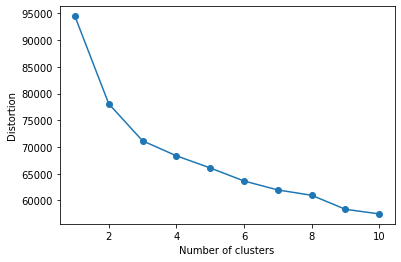

In [9]:
# Plot the distortion for different values of k
plt.plot(range(1, 11), distortions_km, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [10]:
# Rebuilding a model with best parameters
km = KMeans(n_clusters=2,
            init='k-means++',
            n_init=10,
            max_iter=300,
            random_state=0)

y_km = km.fit_predict(X_train_scaled)

In [11]:
y_km

array([1, 0, 1, ..., 1, 0, 1], dtype=int32)

In [12]:
# Evaluating method
from sklearn.metrics import silhouette_score

silhouette_score_km = silhouette_score(X_train_scaled, y_km)

In [13]:
silhouette_score_km

0.16678231764238524

## Clustering by Agglomerative clustering

In [14]:
# Clustering by Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')

y_ac = ac.fit_predict(X_train_scaled)

In [15]:
y_ac

array([1, 0, 1, ..., 0, 0, 0])

In [16]:
# Evaluating method
silhouette_score_ac = silhouette_score(X_train_scaled, y_ac)

In [17]:
silhouette_score_ac

0.14127036346381877